# Import the necessary packages

In [1]:
import pickle 
import numpy as np
import matplotlib.pyplot as plt
import collections
import pandas as pd
from scipy import stats
from scipy.stats import norm
from prog_algs.metrics import prob_success
from sklearn.preprocessing import normalize 
from pathlib import Path
import sys 
plt.rcParams['text.usetex'] = True
sys.path.append('/home/abenezertaye/Desktop/Research/Codes/NASA/Battery Prognostics/Battery Prognostics/Plots and Results/')    



In [4]:
# Iapp = np.loadtxt('./current_inputs/current_matlab_nowind.txt') # Longer trajectory - Flight 1
# plt.plot(Iapp)

# Import the necessary files for visualization
## The following files are related to the actual flights

In [27]:
# Import the current input of flight 1
# Iapp = np.loadtxt('./current_inputs/Flight_{flight_number}_current'.format(flight_number=flight_number)) # Actual trajectory - Flight 1

flight_number = 3
# Import the actual voltage 
data_frame = pd.read_csv('./current_inputs/battery_data_{flight_number}.csv'.format(flight_number=flight_number))
actual_voltage = data_frame['volt'].to_numpy()
Iapp = data_frame['curr'].to_numpy()
np.savetxt('./current_inputs/Flight_{flight_number}_current'.format(flight_number=flight_number), Iapp) # Actual trajectory - Flight 2


# Import the simulation file stored as pickle 
with open('./simulations_pickles/mc_results_flight_{flight_number}_5000T.pkl'.format(flight_number=flight_number), 'rb') as inp:
    mc_results = pickle.load(inp)

In [82]:
# import os
# dirname = './current_inputs/'
# for files in os.listdir(dirname):
#     print(str(files))
#     Iapp = np.loadtxt(str(files))
Iapp = np.loadtxt('./current_inputs/current_matlab_high_wind_3_.txt') # Longer trajectory - Flight 1
print(int(len(Iapp)*0.1))

582


## The following files are related to the simulated flights

In [21]:
Iapp = np.loadtxt('./current_inputs/AIAA paper/current_matlab_low.txt') # Longer trajectory - Flight 1

# with open('./simulations_pickles/mc_results_long.pkl', 'rb') as inp:
#     mc_results = pickle.load(inp)

with open('./current_inputs/AIAA paper/mc_results_low.pkl', 'rb') as inp:
    mc_results = pickle.load(inp)

In [22]:
# mc_results.event_states[ii][tt]
times = mc_results.times 
print('times = ',len(times))

times =  306


# Store the simulation ouputs into array

In [23]:
t = []
v = []

for sim in range(0,len(mc_results.outputs)):
    t.append([])
    v.append([])
    for time in range(0, len(mc_results.outputs[sim])):
        t[sim].append(mc_results.outputs[sim][time]['t']) #<-- store temperature into an array 
        v[sim].append(mc_results.outputs[sim][time]['v']) #<-- store voltage into an array 
        
times = mc_results.times #<-- store simulation time into an array 

soc = []
for ii in range(0, len(mc_results.event_states)):
    soc.append([])
    for tt in range(0, len(times)-2):
        soc[ii].append(mc_results.event_states[ii][tt]['EOD']) #[simulation][time stamp]predict
SOC = np.array(soc) #<-- store SOC into an array 

# Plot the SOC curve 

Text(0.5, 1.0, 'Battery SOC curve')

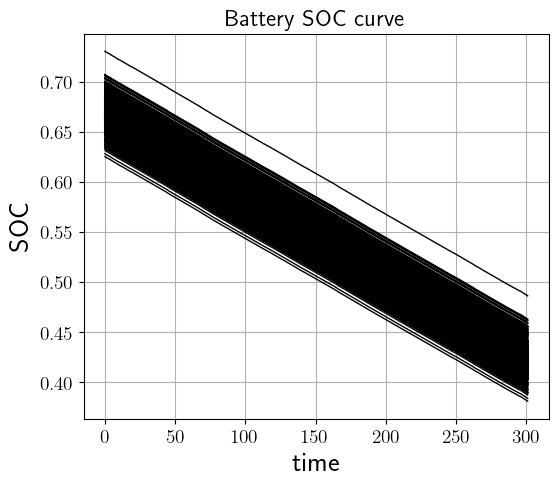

In [24]:
timeStep = 0.1
time_stamp = int(len(Iapp)*timeStep)
# time_stamp = 573
num_traces = 500

for t in range(0,num_traces):
    plt.plot(SOC[t,0:time_stamp],linewidth=1,color='black')
plt.xlabel('time')
plt.ylabel('SOC')
plt.grid()
plt.title('Battery SOC curve')

<Figure size 600x500 with 0 Axes>

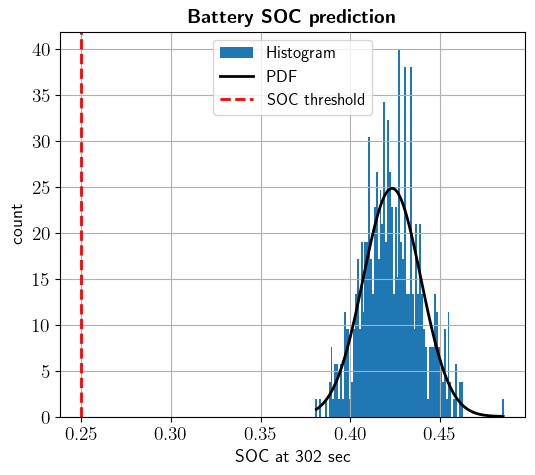

In [25]:
# import the array and compute the std and mean 
# time_stamp = 429
# from matplotlib.pyplot import figure
plt.subplots_adjust(bottom=0.2)
plt.rcParams["figure.figsize"] = (6,5)

SOC_array = SOC[:,time_stamp]
mu = np.mean(SOC_array)
sigma = np.std(SOC_array)

# Generate the bins for the histogram
fig, ax0 = plt.subplots(ncols=1, nrows=1) #creating plot axes
(values, bins, _) = ax0.hist(SOC_array,bins=100,density=True,label="Histogram",linewidth=2)

# Generate the pdf
bin_centers = 0.5*(bins[1:] + bins[:-1])
pdf = stats.norm.pdf(x = bin_centers, loc=mu, scale=sigma) #Compute probability density function
ax0.plot(bin_centers, pdf, label="PDF",color='black',linewidth=2) #Plot PDF
ax0.axvline(x=0.25, color='red',label="SOC threshold",linewidth=2, linestyle='--')
ax0.legend(prop={'size': 12})
plt.xlabel('SOC at {time} sec'.format(time=time_stamp), fontsize=13)
plt.ylabel('count', fontsize=13)
plt.grid()
plt.title(r'\textbf{Battery SOC prediction}', fontsize=14)
plt.savefig('Battery_SOC_low.png', format='png', dpi=140)
# plt.savefig('Battery_SOC_medium.eps', format='eps')

In [19]:
P_success = sum(SOC_array > 0.25)/500
print('The probability of success for the mission is', P_success)

The probability of success for the mission is 0.0


In [9]:
time_stamp

514

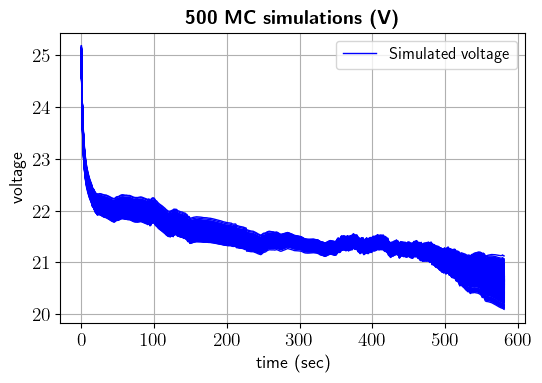

In [20]:
# threshold_voltage = [18,18,18,18,18,18,18,18,18]
plt.subplots_adjust(bottom=0.3)
plt.rcParams["figure.figsize"] = (6,5)

for j in v:#tions, and I can share their answers after the event. Thanks!
    plt.plot(times[0:time_stamp],j[0:time_stamp],linewidth=1, color='blue')#, label='simulated voltage')
    
plt.plot(times[0:time_stamp],j[0:time_stamp],linewidth=1, color='blue', label='Simulated voltage')
# plt.plot(actual_voltage[0::10],linewidth=1, color='red', label='Actual voltage')    
plt.xlabel('time (sec)', fontsize=13)
plt.ylabel('voltage', fontsize=13)
plt.title(r'\textbf{500 MC simulations (V)}', fontsize=14)
plt.legend(prop={'size': 12})
plt.grid()
# plt.legend(['simulated voltage', 'voltage every 10 sec'])
plt.savefig('MC_Sim_Voltage_strong.png', format='png', dpi=140)
# plt.savefig('MC_Sim_Voltage_strong.eps', format='eps')

# Plot the current input profile

In [ ]:
plt.plot(Iapp[0:time_stamp*10],'-',linewidth=1.2,color='blue')
# plt.plot(Iapp[0:time_stamp*10],linewidth=1,color='black')
plt.xlabel('time')
plt.ylabel('current')
plt.title('Current input')
# plt.legend()
plt.grid()
# plt.legend(['simulated voltage', 'voltage every 10 sec'])
plt.savefig('Current_profile_flight_{flight_number}.png'.format(flight_number=flight_number),format='png',dpi=140)

# This section can be used to plot the results if the experiment was done using Uncented Transform

In [ ]:
# print(mc_results.outputs.__dir__())

In [ ]:
# mc_results.outputs._LazyUTPrediction__states.snapshot

In [ ]:
# print(mc_results.outputs._LazyUTPrediction__states.__dir__())

In [ ]:
# mc_results.snapshot

In [ ]:
# print(mc_results.event_states.__dir__())

In [ ]:
mc_results.event_states._LazyUTPrediction__data

In [ ]:
# mc_results